## Course Project

**Instructions:** <br>
a. In the course project, you will analyze a real-world dataset on credit card fraud detection. You will write a report on your data analysis using Jupyter Notebook. <br>
b. For each step, make sure to explain what you are doing, annotate your results, and provide your interpretation. <br>
c. When you finish, make sure to use `Kernel` -> `Restart and Run All` to restart the kernel and rerun the entire notebook to generate the desired outputs, before submitting your project report. <br>
d. Upload your .ipynb file to Canvas for grading. <br>
e. All questions related to the course project shall be posted in the Discussions section on Canvas. <br>
<br>

**Policy:** <br>
The course project is worth 25 points, counting towards 25% of the course final score. <br>

Late submission, empty submission or no submission receives 0 point. Please note that in order to pass the course, at least 30% of the total score for the project must be obtained. In case of special circumstances, email the instructor directly ahead of time. 

### Credit Card Fraud Detection
You can download the csv files from the project folder on Canvas.  <br>

#### Context
Credit card companies aim to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### Content
The dataset contains transactions made by credit cards in September 2013 by european cardholders.
Transactions occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, as the positive class (frauds) account for 0.172% of all transactions. <br>

It contains numerical input variables V1-V28 which are the result of a Principal Component Analysis (PCA) transformation, as original features are not provided due to confidentiality issues. Features that have not been transformed with PCA are 'Time' and 'Amount'. 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 'Amount' denotes the transaction Amount. 'Class' is the response variable (labelled outcome) and it takes value 1 in case of fraud and 0 otherwise.  <br>

### Module 1: Data Exploration
Load `creditcard_train.csv` and explore the dataset. How do the data look like? Are there any missing values? What do you do with missing values, i.e. removal, imputation, etc.?<br>
Are there any outliers? What do you do with outliers, i.e. drop them, explore the effects of outliers on models, etc.? <br>
Record your analysis procedures. For example, 20 observations are removed due to missingness, and 3,000 observations remain for further analysis. <br>

Hint: for removal of extreme outliers, consider: Q1=df.quantile(0.25); Q3=df.quantile(0.75); IQR=Q3-Q1; <br>
Remove samples that are smaller than Q1 - 2.5 * IQR or larger than Q3 + 2.5 * IQR.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('creditcard_train.csv')

In [2]:
df.shape

(284657, 31)

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,...,284657.000000,284379.000000,284137.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000
mean,94820.043168,0.000942,-0.000761,0.001280,-0.000844,0.000591,0.000233,0.000956,-0.000145,0.000553,...,-0.000075,-0.000035,0.000011,0.000045,-0.000016,0.000008,-0.000056,-0.000008,88.340966,0.001553
std,47486.331846,1.955946,1.649907,1.510265,1.413999,1.378060,1.332089,1.230796,1.192554,1.097575,...,0.733731,0.725929,0.625052,0.605657,0.521244,0.482238,0.403245,0.330077,250.129519,0.039374
min,0.000000,-56.407510,-72.715728,-48.325590,-5.683171,-113.743300,-26.160506,-43.557240,-73.216718,-13.434070,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565680,-15.430080,0.000000,0.000000
25%,54208.000000,-0.920083,-0.598696,-0.889759,-0.848833,-0.691445,-0.768153,-0.553921,-0.208633,-0.642783,...,-0.228421,-0.542878,-0.162192,-0.354543,-0.317147,-0.326978,-0.070844,-0.052954,5.600000,0.000000
50%,84704.000000,0.018393,0.065213,0.179930,-0.020146,-0.054336,-0.274058,0.040115,0.022323,-0.051198,...,-0.029518,0.007694,-0.011614,0.041012,0.016532,-0.052152,0.001326,0.011233,22.000000,0.000000
75%,139324.000000,1.315753,0.803360,1.027294,0.742826,0.611926,0.398611,0.570420,0.327241,0.597343,...,0.186287,0.529204,0.148051,0.439603,0.350702,0.240932,0.091001,0.078243,77.150000,0.000000
max,172792.000000,2.454930,22.057730,9.382558,16.875340,34.801666,73.301630,120.589500,20.007208,15.594990,...,27.202839,10.503090,22.528410,4.584549,7.519589,3.517346,31.612200,33.847808,25691.160000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284657 entries, 0 to 284656
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284657 non-null  float64
 1   V1      284657 non-null  float64
 2   V2      284657 non-null  float64
 3   V3      284657 non-null  float64
 4   V4      284657 non-null  float64
 5   V5      284657 non-null  float64
 6   V6      284657 non-null  float64
 7   V7      284657 non-null  float64
 8   V8      284657 non-null  float64
 9   V9      284657 non-null  float64
 10  V10     284657 non-null  float64
 11  V11     284657 non-null  float64
 12  V12     284657 non-null  float64
 13  V13     284657 non-null  float64
 14  V14     284657 non-null  float64
 15  V15     284657 non-null  float64
 16  V16     284657 non-null  float64
 17  V17     284657 non-null  float64
 18  V18     284657 non-null  float64
 19  V19     284657 non-null  float64
 20  V20     284657 non-null  float64
 21  V21     28

total frauds : 442
total nonfrauds : 284215
total transactions : 284657
Percentage : 0.15551607058037048


Text(0, 0.5, 'Frequency')

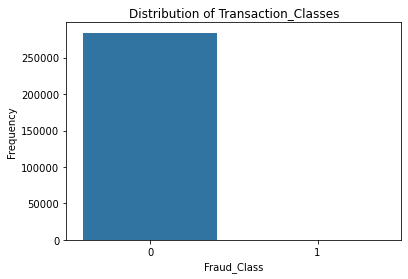

In [5]:
frauds = df.loc[df['Class']== 1] 
noproblem = df.loc[df['Class']== 0] 
print(f"total frauds : {len(frauds)}") 
print(f"total nonfrauds : {len(noproblem)}") 
print(f"total transactions : {len(frauds)+len(noproblem)}")
print(f"Percentage : {len(frauds)/float(len(noproblem))*100}")
a = sns.countplot(x = "Class", data = df)
plt.title("Distribution of Transaction_Classes")
plt.xlabel("Fraud_Class")
plt.ylabel("Frequency")

First, there are 284,657 rows and 31 coulmns in this dataset and we have calculated some statistical data like percentile, mean and standard deviation of the numerical values through the describe() method which is shown in the fisrst large table.

In the next large table, we have found the information about this dataset including the index dtype and column dtypes, non-null values and memory usage. It is shown that the dtype is mostly float64. However, in the column of non-null values, there are some missing values in V22 and V23 that the totals of non-null are not equal to 284,657. So, We would do something to deal with those NA in the following step.

After that, we have calculated the exact number of frauds in the dataset by using 'Class' column and separated them by '0' and '1'. We found that the number of frauds is 442 and the positive class (frauds) account for 0.155% of all transactions while the number of non-frauds is 284,215. The countplot below shows the distribution of the transaction classes and it is clearly that the number of non-frauds is much larger than that of frauds.

In [6]:
n = df.columns[df.dtypes != 'object']
df[n].isnull().sum()

Time        0
V1          0
V2          0
V3          0
V4          0
V5          0
V6          0
V7          0
V8          0
V9          0
V10         0
V11         0
V12         0
V13         0
V14         0
V15         0
V16         0
V17         0
V18         0
V19         0
V20         0
V21         0
V22       278
V23       520
V24         0
V25         0
V26         0
V27         0
V28         0
Amount      0
Class       0
dtype: int64

In [7]:
df1 = df.dropna()
df1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284652,172786.0,-11.881120,10.071780,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284653,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284654,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296826,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284655,172788.0,-0.240440,0.530482,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546669,0.108821,0.104533,10.00,0


In [8]:
frauds = df1.loc[df['Class']== 1] 
noproblem = df1.loc[df['Class']== 0] 
print(f"total frauds : {len(frauds)}") 
print(f"total nonfrauds : {len(noproblem)}") 
print(f"total transactions : {len(frauds)+len(noproblem)}") 
print(f"Percentage : {len(frauds)/float(len(noproblem))*100}")

total frauds : 442
total nonfrauds : 283417
total transactions : 283859
Percentage : 0.15595394771661544


Previously, we found that there are some missing values in V22 and V23 and now in the first table we found that V22 and V23 have 278 and 520 missing values respectively.

In order to deal with those missing values, we choose to remove the missing value by dropna(). After the removal,
the second table shows the part of the dataset and we have calculated the number of frauds and the total number of transactions. The result shows that the number of frauds remains unchanged(422) but the number of nonfrauds has dropped to 283,417 and thus the transactions drops. It shows that all the missing values are from the normal transactions but not fraud class.

To conclude, 798 transactions are removed  due to the missing values and 283,859 transactions including 442 frauds are remaining for further analysis. 

In [9]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Time      85111.000000
V1            2.236328
V2            1.402673
V3            1.916674
V4            1.590742
V5            1.303657
V6            1.167098
V7            1.124454
V8            0.536093
V9            1.240117
V10           0.989581
V11           1.501677
V12           1.023371
V13           1.311031
V14           0.918732
V15           1.231701
V16           0.991121
V17           0.883534
V18           0.999633
V19           0.915281
V20           0.344835
V21           0.415207
V22           1.072187
V23           0.310260
V24           0.794177
V25           0.667960
V26           0.567656
V27           0.161898
V28           0.131266
Amount       71.650000
Class         0.000000
dtype: float64


In [10]:
cols = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28',]
df_out = df1[~((df1[cols] < (Q1 - 2.5 * IQR)) | (df1[cols] > (Q3 + 2.5 * IQR))).any(axis=1)]
print(df_out.shape)

(223179, 31)


In [11]:
frauds = df_out.loc[df['Class']== 1] 
noproblem = df_out.loc[df['Class']== 0] 
print(f"total frauds : {len(frauds)}") 
print(f"total nonfrauds : {len(noproblem)}") 
print(f"total transactions : {len(frauds)+len(noproblem)}") 
print(f"Percentage : {len(frauds)/float(len(noproblem))*100}")

total frauds : 36
total nonfrauds : 223143
total transactions : 223179
Percentage : 0.016133152283513263


Besides, we found that there are some outliers in the dataset. Since the outliers would affect the accuracy of the model, we would remove the outliers by using the inter quartile range method. 

First, we have calculated the Q1 and Q3 of the remaining dataset and removed those in V1 to V28 only that are smaller than Q1 - 2.5 * IQR or larger than Q3 + 2.5 * IQR. 

After removing the outliers, 223,179 transactions are left behind and 406 outliers have been removed.

We do the calculation again to find the total number of transaction between two classes. It shows that only 36 frauds are left and 406 outliers are removed from the frauds while the number of normal transactions drops by 60,274 and 223,143 transactions are left. In total, 60680 outliers are removed the from total transactions. 

In conclusion, 36 frauds and 223179 total transactions including frauds will be used for further analysis. 

### Module 2: Data Visualization
What are the distributions of variables? Are the variables distributed differently in the Fraud group and in the Normal group? Use tables and/or figures to visualize your exploration and findings. Present no more than 5 figures/tables that you think are important, and you may state in your findings that other variables a, b, c have similar patterns.

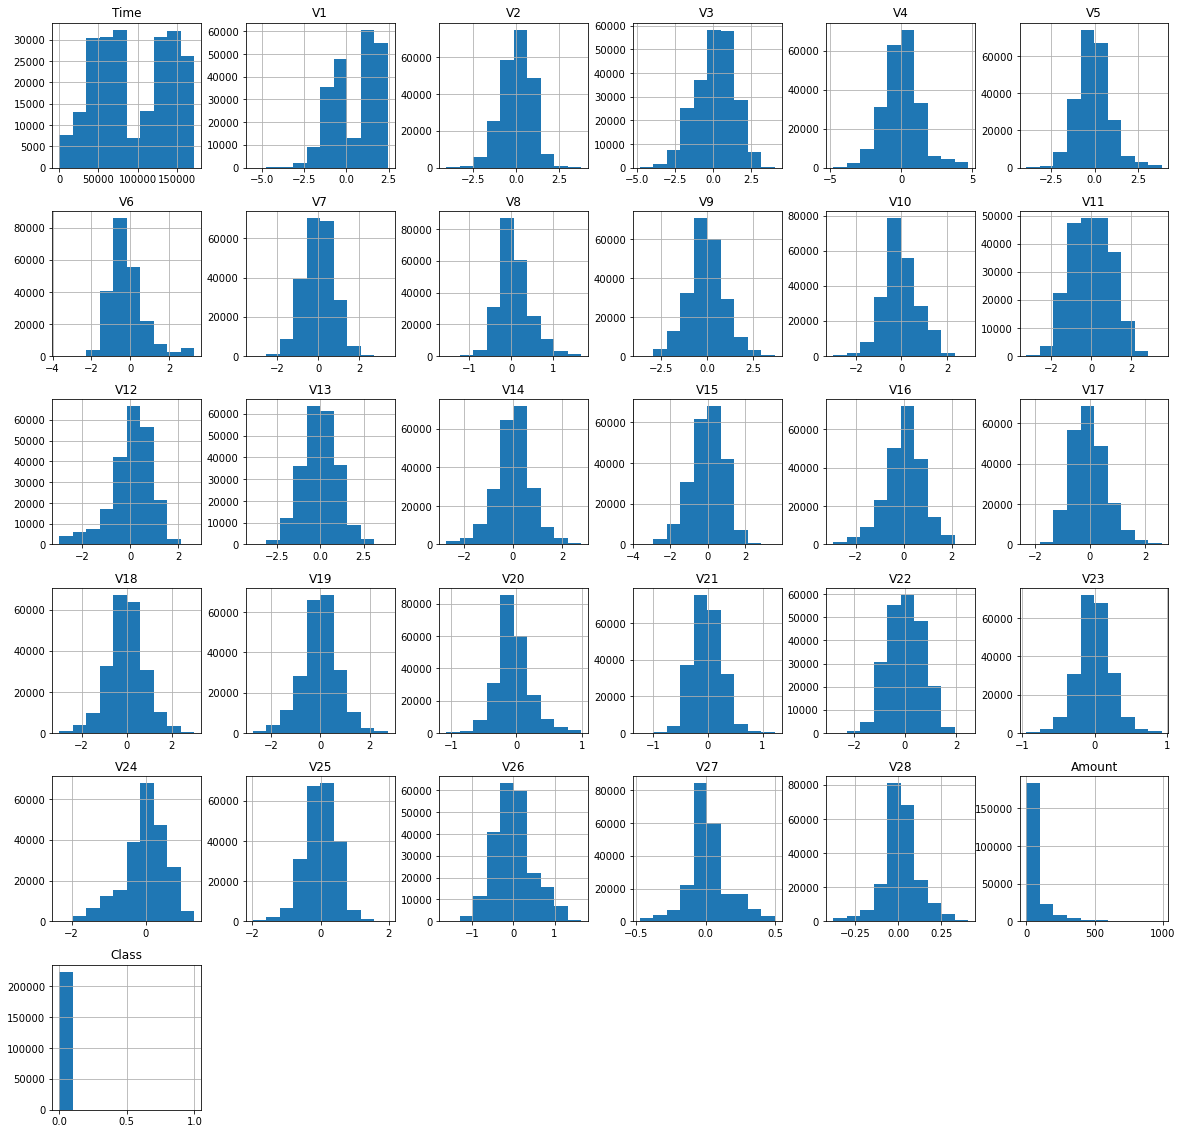

In [12]:
df_out.hist(figsize= (20,20))
plt.show()

/Users/krystalcheung/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/krystalcheung/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

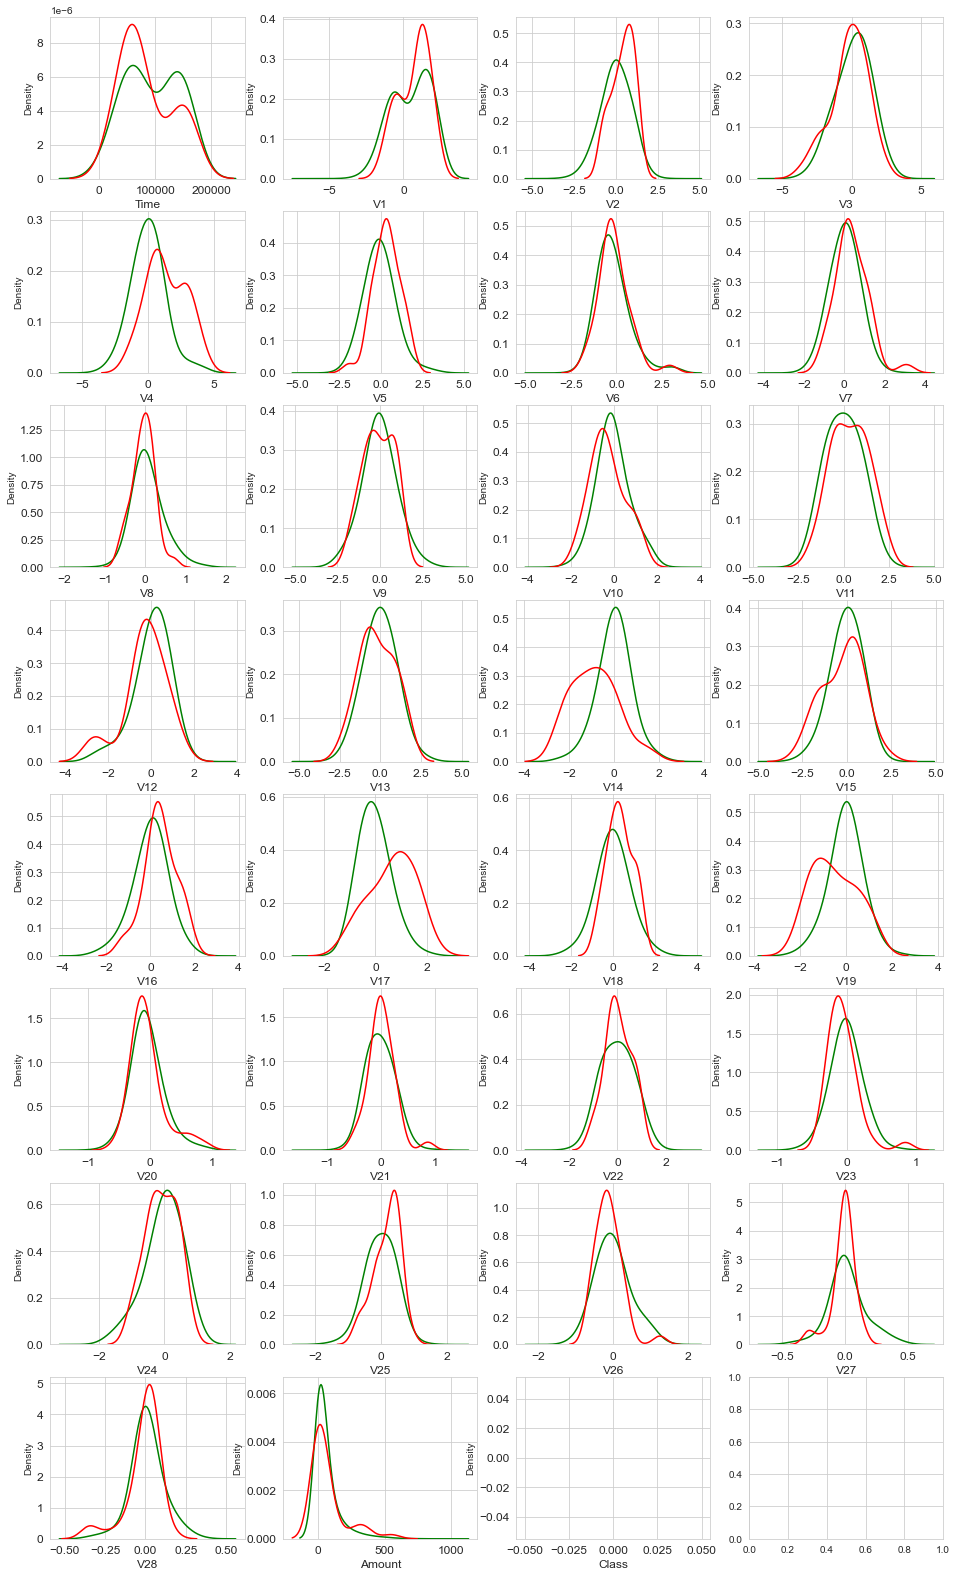

In [13]:
var = df_out.columns.values

i = 0
nonfrauds = df_out.loc[df_out['Class'] == 0]
frauds = df_out.loc[df_out['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(nonfrauds[feature], bw_method=0.5,label="Class = 0",color = "green")
    sns.kdeplot(frauds[feature], bw_method=0.5,label="Class = 1",color = "red")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

For the first graph, the several histgrams have shown that the distributions of 31 variables of the dataset after data-cleaning process and removal of outliers.

The second graph shows that the distributions of different variables in two groups (Frauds and Nonfrauds). The frauds group is shown by red line while the nonfrauds group is shown by green line. We can see that in some independent varibales, there are a some separation bewteen the distributions of the two classes (Frauds and Nonfrauds). For example, V14 and V17, V19 are distributed differently in the Fraud group and in the Nonfraud group.  On the other hand, V3, V5, V6, V7 are distributed similarly in two differnt classes.

<AxesSubplot:title={'center':'Credit Card Transactions features correlation plot'}>

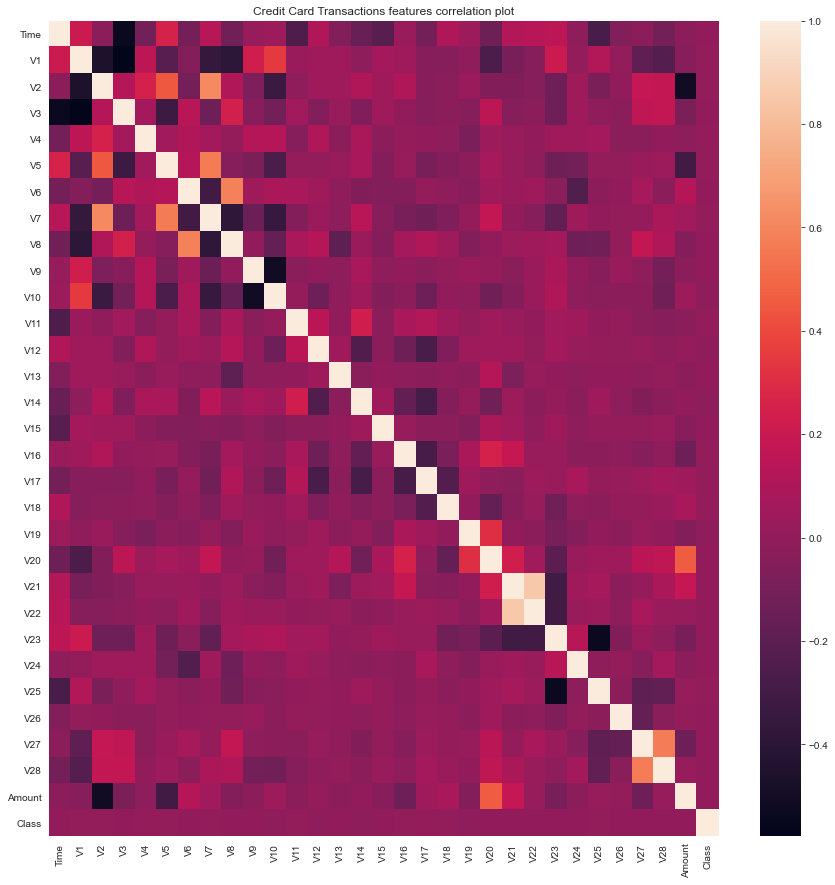

In [14]:
plt.figure(figsize = (15,15))
plt.title('Credit Card Transactions features correlation plot')
sns.heatmap(df_out.corr())

The heatmap above has shown that the correlations of 31 varibales. The lighter the color means that the stronger positive correlation of the two independent variables while the darker the color means the stronger negative correlation.

It shows that there are some correaltions bewtween the variables of V1 to V28. For example, V21 and V22 has positive correlation with each other while V1 has a strong negative correlation with V3.

However, there are some negative correaltionships between Time and some of the variables (e.g V3, V11, V25). Also, Amount is negative correlated with V2 and V5 while it is positive correlated with V20.

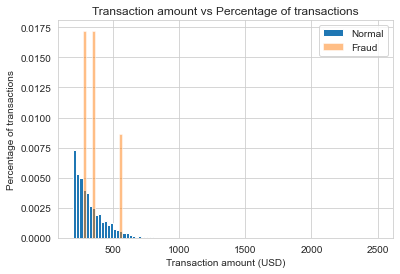

In [15]:
nonfrauds = df_out.loc[df_out['Class'] == 0]
frauds = df_out.loc[df_out['Class'] == 1]

bins = np.linspace(200, 2500, 100)
plt.hist(nonfrauds.Amount, bins=bins, alpha=1, density=True, label='Normal')
plt.hist(frauds.Amount, bins=bins, alpha=0.5, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Transaction amount vs Percentage of transactions")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions");
plt.show()

From the above graph, we can see that all the transactions are below USD1000 after we have removed all the missing values and the outliers. And we found that the fraudulent transcations are apperaed when the transaction is about or below USD$700 that mostly around USD100 and USD300.

### Module 3: Dimension Reduction
Apply unsupervised learning methods to achieve dimension reduction. Visualize and interpret the results. Any dimension reduction algorithms can be used.

In [16]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
b = pd.DataFrame(df_out)
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
print(features)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']


In [17]:
b['Class'].replace(0, 'Normal', inplace=True)
b['Class'].replace(1, 'Fraud', inplace=True)
b.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,Normal
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,Normal
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,Normal
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,Normal
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,Normal


In [18]:
print(b.loc[0,features].min(), b.loc[0, features].max())

-1.3598071336738 2.53634673796914


In order to do the dimension reduction foe the dataset, we first choose the model class(PCA) and we have made a new copy of the dataset after removing all the missing values and the outliers. Also, we made a new dataframe which only keep the values in V1 to V28 for the dimension reduction.

Next, we replaced the '0' and '1' by 'Normal' and 'Fraud 'in 'Class' in order to better distinguish the two classes in the graph.

Besides, we have found the minimum value and the maximum values of V1 that might be useful for the dimension reduction.

In [19]:
x = b.loc[:, features].values
x = StandardScaler().fit_transform(x)
y = b['Class']

In [20]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
n = pd.DataFrame(x,columns=feat_cols)
n.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27
223174,1.222410,-0.211928,-1.054413,0.180035,0.060370,-0.594897,-0.014339,-0.497551,0.484745,0.425313,...,0.768606,-0.815793,-0.952661,-1.063160,1.333043,-0.577948,-0.690833,0.430533,-0.689213,-0.862605
223175,-0.287991,1.038900,-0.541395,-0.583100,1.287048,-0.051185,1.077316,0.113999,-0.165151,-0.818409,...,0.180530,0.175736,-1.128310,-1.198214,0.245657,0.224642,-0.950883,0.265578,1.375238,0.547897
223176,-0.959366,-0.076071,1.493172,-0.578030,1.004796,1.383339,-0.004350,0.585204,0.636581,-1.246568,...,-2.094723,0.402604,0.882578,1.364895,0.079292,-1.716950,-1.320120,-0.846458,0.342428,-0.651401
223177,1.127977,-0.354421,-2.672592,-0.437224,2.902693,3.569773,-0.444974,1.669143,0.481749,-0.586331,...,-0.778993,0.178508,0.950468,0.852904,-0.140145,1.156956,0.566286,-0.187193,-0.099929,-0.387028
223178,-0.802461,-0.228324,0.443434,-0.397063,0.056243,-0.509611,2.125907,-1.274495,0.536351,-1.165239,...,-0.342635,1.647152,1.060876,0.948821,1.679332,0.061541,-1.032575,-1.752243,-0.147401,0.007178


In [21]:
P = PCA(n_components=2)
principalComponents = P.fit_transform(x)
principal_df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principal_df.head()

,principal component 1,principal component 2
0,-1.375474,1.472432
1,0.394529,-0.297249
2,0.182534,2.267313
3,-0.947521,1.480730
4,-2.315476,0.978952


In [22]:
finalDf=pd.concat([principal_df,df_out[['Class']]],axis=1)
finalDf.head()

,principal component 1,principal component 2,Class
0,-1.375474,1.472432,Normal
1,0.394529,-0.297249,Normal
2,0.182534,2.267313,Normal
3,-0.947521,1.480730,Normal
4,-2.315476,0.978952,Normal


We then instantiate the model with hyperparameters, fit to data and transform the data to two dimensions at the same time and lastly stored them into a new dataframe called principalComponents.

Next, we only get the two columns in principalComponents which are 'principal component 1', 'principal component 2'  and combine the 'Class' with the two columns to conduct the dimension reduction.

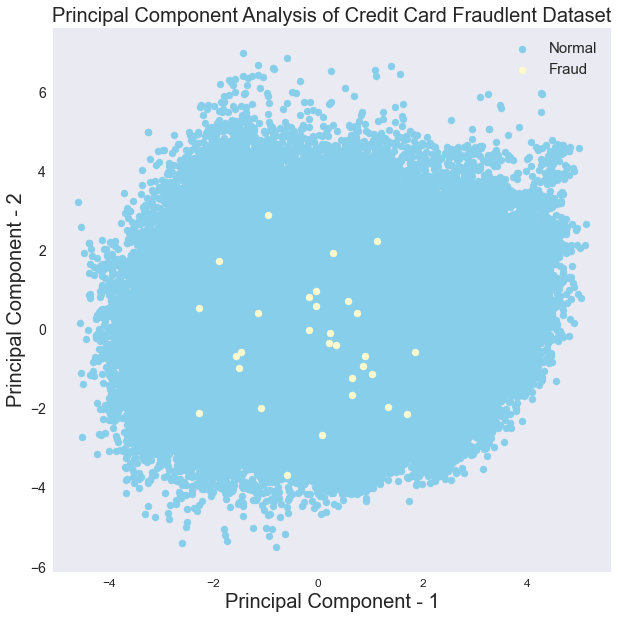

In [23]:
plt.style.use("seaborn")
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)
plt.title("Principal Component Analysis of Credit Card Fraudlent Dataset", fontsize=20)
targets = ['Normal', 'Fraud']
colors = ['skyblue', 'lemonchiffon']
for target, color in zip(targets, colors):
    indicesToKeep = (finalDf['Class'] == target)
    plt.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets, prop={'size': 15})
plt.grid()

From the above graph, it has shown the Principal Component Analysis(PCA) of Credit Card Fraudlent Dataset and the classes are represented in two different colors (Blue = Normal; Yellow = Fraud).

However, it seems that the two principal components are not well separated so we will do again and want to get a result that in a lower-dimensional projection of the data that preserves the maximal data variance.

This time the transformed data has been reduced to a single dimension. In order to understand the effect of this dimensionality reduction, we will perform the inverse transform of this reduced data and plot it along with the data.

Before doing the dimension reduction, we replace the classes into '0' and '1' so we can continue the reduction.

Then, similarly, we will get a new column called principal component and combined it with 'Class'. The data is shown below.

In [24]:
b['Class'].replace('Normal', 0, inplace=True)
b['Class'].replace('Fraud', 1, inplace=True)
b.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [25]:
pca = PCA(n_components=1)
pc = pca.fit_transform(x)
pdf = pd.DataFrame(data = pc, columns = ['principal component'])
pdf1 = pd.concat([pdf,df_out[['Class']]],axis=1)
print(pdf1.head())
print("original shape:   ", df_out.shape)
print("transformed shape:", pc.shape)

   principal component  Class
0            -1.374954    0.0
1             0.395881    0.0
2             0.185731    0.0
3            -0.946675    0.0
4            -2.316867    0.0
original shape:    (223179, 31)
transformed shape: (223179, 1)


Text(0.5, 1.0, 'Principal Component Analysis 2 of Credit Card Fraudlent Dataset')

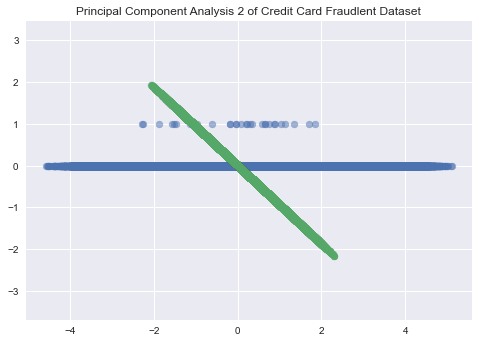

In [26]:
pc_new = pca.inverse_transform(pc)
plt.scatter(x = pdf1.iloc[:, 0].values, y = pdf1.iloc[:, 1].values, alpha=0.5)
plt.scatter(pc_new[:, 0], pc_new[:, 1], alpha=0.8)
plt.axis('equal');
plt.title("Principal Component Analysis 2 of Credit Card Fraudlent Dataset")


The blue points are the original data, while the greem points are the projected version. It has removed the information along the least important principal axis or axes and left the components of the data with the highest variance only. 

### Module 4: Classification
Choose three classification methods and build classification models, using 5-fold cross-validation. <br>

Further, load `creditcard_test.csv` and use it as the test dataset to evaluate your models and compare their performance. Consider visualizing the results, and evaluate the results using metrics such as the overall accuracy and the confusion matrix. <br>

Hint: because the dataset is highly unbalanced, consider undersampling, i.e. randomly select N normal observations of the same size as the N fraud observations, and use N+N=2N samples for model fitting and training. 

In [27]:
###pick 3 classification methods, and methods not in the below list can also be used; you can also pick more than three methods
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

We will use the below 3 methods to conduct the classification.

1: Logistic Regression

2: Random Forest

3: Decision Tree

Before starting the classification, we have made a classification model which used 5-fold cross-validation and is shown below.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

In [29]:
X = df_out.iloc[:, 1:29]
y = df_out['Class']
cv = KFold(n_splits=5, random_state=1, shuffle=True)
model = LinearRegression()
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
print(mean(absolute(scores)))
print(sqrt(mean(absolute(scores))))

0.00046404184060466785
0.021541630407298975


In [30]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 0)
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)
model = GaussianNB() 
model.fit(Xtrain, ytrain) 
y_model = model.predict(Xtest)
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
accuracy_score(ytest, y_model)

(167384, 28)
(55795, 28)
(167384,)
(55795,)


0.9927412850613855

We have found three values which are mean absolute error (MAE), root mean squared error (RMSE) and accuracy score respectively.

The first figure is the mean absolute error (MAE). We can see that it is about 0.000464 which means the average absolute error between the model prediction and the actual observed data is 0.000464. 

In general, the lower the MAE, the more closely a model is able to predict the actual observations. So it is close to predict the actual value.

The second figure is the root mean squared error (RMSE) which is about 0.0215. Also, in general, the lower the RMSE, the more closely a model is able to predict the actual observations.

The third figure has shown the accuracy score to see the fraction of predicted labels that match their true value. We can see that the accuracy is about 99.3% which the classification algorithm is effective for the dataset.

Overall, our model is more closely to predict the actual observations.

Next, we will use another dataset (creditcard_test.csv) to conduct the classification and do a comparison. The classification methods that will be used are listed above.

Since the dataset is highly unbalanced, we would consider undersampling the majority class (normal cases) and randomly select N normal observations of the same size as the N fraud observations, and then use N+N=2N samples for model fitting and training.

In [31]:
dF = pd.read_csv('creditcard_test.csv')

In [32]:
X_f = dF.iloc[:, 1:29]
y_f = dF['Class']

Counter({0: 223143, 1: 36})
Counter({0: 50, 1: 50})


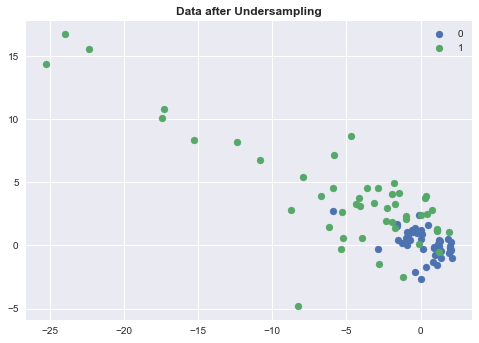

In [33]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification
from collections import Counter
from numpy import where
from matplotlib import pyplot
print(Counter(y))
undersample = RandomUnderSampler(sampling_strategy=1)
X_over, y_over = undersample.fit_resample(X_f, y_f)
counter = Counter(y_over)
print(counter)
for label, _ in counter.items():
    row_ix = where(y_over == label)[0]
    pyplot.scatter(X_over.iloc[row_ix, 0].values, X_over.iloc[row_ix, 1].values, label=str(label))
pyplot.title( 'Data after Undersampling', weight='bold')
pyplot.legend()
pyplot.show()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, 
                                                    random_state=0)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

Accuracy Score:
0.900
ROC AUC Score:
0.9911111111111112

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.93      0.87      0.90        15

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



Text(0.5, 1.0, 'Confusion Matrix')

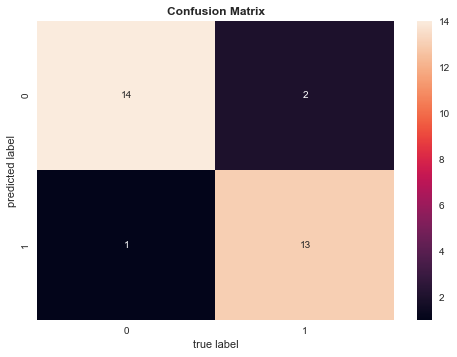

In [35]:
reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)
print(f'Accuracy Score:\n{accuracy_score(y_test, y_pred):0.3f}')
probs = reg_log.predict_proba(X_test)
print('ROC AUC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
import seaborn as sns 
mat=confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T,annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title( 'Confusion Matrix', weight='bold')

For the Logistic Regression Model, we get the accuracy score which is 90% and the ROC score which is 99.1% of the model. This means that the logistic regression algorithm is quite effective for the dataset.

Besides, we can get more information from the confusion matrix:

True Positive (TP) = 14; meaning 14 positive class data points were correctly classified by the model and the model predicts 15 cases of normal cases and 14 of them are actual no-fraud.

True Negative (TN) = 1; meaning 1 negative class data points were correctly classified by the model

False Positive (FP) = 2; meaning 2 negative class data points were incorrectly classified as belonging to the positive class by the model and it shows that we miss 2 cases of actual fraud.

False Negative (FN) = 13; meaning 13 positive class data points were incorrectly classified as belonging to the negative class by the model and it predicts 15 cases of fraud and 13 of them are actual fraud. 

Also, we found a relatively high precision score. Recall is therefore not as good as precision.

Accuracy Score:
0.900
ROC AUC Score:
0.9533333333333334

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.93      0.87      0.90        15

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



Text(0.5, 1.0, 'Confusion Matrix')

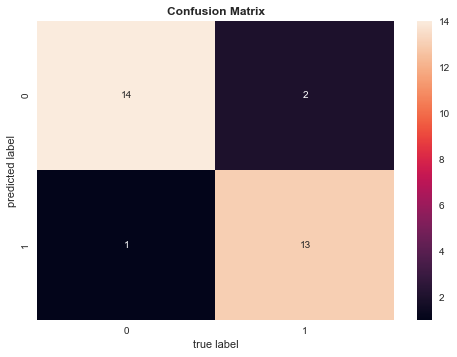

In [36]:
model = RandomForestClassifier(random_state=5, n_estimators=20)
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print(f'Accuracy Score:\n{accuracy_score(y_test, predicted):0.3f}')
probs = model.predict_proba(X_test)
print('ROC AUC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print('\nClassification Report:')
print(classification_report(y_test, predicted))
import seaborn as sns 
mat=confusion_matrix(y_test, predicted)
sns.heatmap(mat.T,annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title( 'Confusion Matrix', weight='bold')

For the Random Forest Model, we get the accuracy score and the ROC score of the model that are 90% and 95.3% repectively. However, they are smaller than the those of logistic regression which means that the random forest algorithm is less effective than the logistic regression for the dataset.

From the confusion matrix, the True Positive (TP) is 14 which means that the model predicts 15 cases of normal cases and 14 of them are actual no-fraud while the True Negative (TN) = 1 means that 1 negative class data points were correctly classified by the model

The False Positive (FP) = 2 shows that we miss 2 cases of actual fraud while the False Negative (FN) = 13 means that the model and it predicts 15 cases of fraud and 13 of them are actual fraud.

Accuracy Score:
0.933
ROC AUC Score:
0.9333333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.87      0.93        15

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



Text(0.5, 1.0, 'Confusion Matrix')

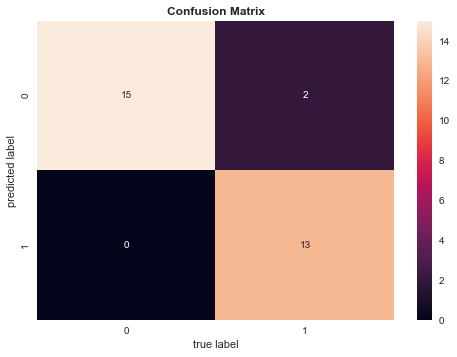

In [37]:
dc = DecisionTreeClassifier()
dc.fit(X_train, y_train)
y1 = dc.predict(X_test)
print(f'Accuracy Score:\n{accuracy_score(y_test, y1):0.3f}')
probs = dc.predict_proba(X_test)
print('ROC AUC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print('\nClassification Report:')
print(classification_report(y_test, y1))
mat2=confusion_matrix(y_test, y1)
sns.heatmap(mat2.T,annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title( 'Confusion Matrix', weight='bold')

For the Decision Tree Model, we get the accuracy score and the ROC score of the model that are 93.3% and 93.3% repectively. Both scores are less than logistic regression and the ROC score is less than that of random forest. It means that the decision tree algorithm is less effective than the logistic regression and random forest for the dataset.

The confusion matrix of Decision Tree is similar to Random Forest which the True Positive (TP) is 15 which means that the model predicts 15 cases of normal cases and all are actual no-fraud while the True Negative (TN) = 0 means that 0 negative class data points were correctly classified by the model.

The False Positive (FP) = 2 shows that we miss 2 cases of actual fraud while the False Negative (FN) = 13 means that the model and it predicts 15 cases of fraud and 13 of them are actual fraud.

In [38]:
print("Scores of Logistic Regression")
print("Precision score: {}".format(precision_score(y_test,y_pred)))
print("Recall score: {}".format(recall_score(y_test,y_pred)))
print("F1 Score: {}".format(f1_score(y_test,y_pred)))
print("\n")
print("Scores of Random Forest")
print("Precision score: {}".format(precision_score(y_test,predicted)))
print("Recall score: {}".format(recall_score(y_test,predicted)))
print("F1 Score: {}".format(f1_score(y_test,predicted)))
print("\n")
print("Scores of Decision Tree")
print("Precision score: {}".format(precision_score(y_test,y1)))
print("Recall score: {}".format(recall_score(y_test,y1)))
print("F1 Score: {}".format(f1_score(y_test,y1)))

Scores of Logistic Regression
Precision score: 0.9285714285714286
Recall score: 0.8666666666666667
F1 Score: 0.896551724137931


Scores of Random Forest
Precision score: 0.9285714285714286
Recall score: 0.8666666666666667
F1 Score: 0.896551724137931


Scores of Decision Tree
Precision score: 1.0
Recall score: 0.8666666666666667
F1 Score: 0.9285714285714286


/Users/krystalcheung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/krystalcheung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/krystalcheung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveD

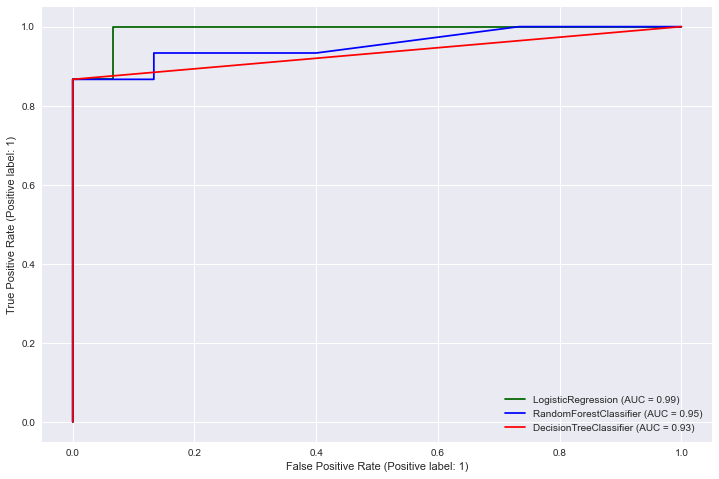

In [39]:
from sklearn.metrics import plot_roc_curve
fig, ax = plt.subplots(figsize=(12, 8))
plot_roc_curve(reg_log, X_test, y_test, color='darkgreen', ax=ax)
plot_roc_curve(model, X_test, y_test, color='blue', ax=ax)
plot_roc_curve(dc, X_test, y_test, color='red', ax=ax)

In order to find out which algorithm has the best performance and make a comparison between three models, we have calculated the precision score, recall score and F-1 score for the three algorithms.

From the above figure, We can clearly see the precision scores of Logistic Regression Model and Random Forest are similar while the recall scores of three model are similar. Decision Tree Model has the highest F1 score and the precision score. In order to find the performances of three models, we move on to the accuracy score and ROC AUC score that have been calculated before (above three confusion matrices).

The accuracy score of Decision Tree is similar to that of Random Forest while ROC AUC score of Decision Tree is a little bit larger than that of Random Forest. However, since the model is randomly undersampling, the result will be different every time so it is difficult to conclude that which algorithm has a better performance among Random Forest and Decision Tree. 

On the other hand, the accuracy score of Decision Tree is greater than Logistic Regression and Random Forest but the ROC AUC score of Logistic Regressio is the greatest among the three models.

Since it uses random undersampling, the result will be varied every time and different scores will be differnt also. However, the ROC AUC score of Logistic Regression is always the greatest among the three models after testing for a few times. So we conclude that the Logistic Regression Model has the best performance.

### Module 5: Summary
Summarize your findings and draw conclusions.

Firstly, we have explored the dataset about the transactions made by credit cards in September 2013 by european cardholders. We found that in the recorded two days, there were actually 442 frauds out of 284,657 transactions and the positive class (frauds) account for 0.156% of all transactions. It is clearly that the dataset is unbalanced.

Also, we found that there are some missing values and outliers in V1-V28. So we have removed those in order to have a more accurate dataset used for the data visualization.

For the data visualization part, we have plotted out four graphs which have shown the distributions of 31 variables of the dataset and the distributions of different variables in two groups (Frauds and Nonfrauds).

Also, we have found out the correlations between different variables. However, it seems that V1 to V28 do not have a correlation with class, but they have some correlations with each other.

For the dimension reduction part, we have used PCA to do the dimension reduction and we have tested both two dimension and a single dimension since we found that the two dimension is still difficult for us to find which components of the data is important.

For the classification part, we found that the confusion matrix and different scores of three models will vary when we run the model once because of the random undersampling of the dataset. However, the accuracy score and the ROC score of Logistic Regression Model are always the greatest among the three models. So we conclude that Logistic Regression Model has the best performance and it is the most effective for the dataset.

From this project, we have learned more about exploring the dataset, how to visualize data and know more about dimension reduction. However, since the dataset is highly umbalanced, it is difficult to get a good result and undersampling can deal with this problem.

In conclusion, since we have used undersampling instead of oversampling and undersample a large majority Class(Normal) into fewer samples, our model will not be overfitted and at the same time the information of data is loosen and might cause some errors during the classification.